<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Constants" data-toc-modified-id="Constants-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#ML-baseline" data-toc-modified-id="ML-baseline-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ML baseline</a></span></li><li><span><a href="#Find-confidence-regions" data-toc-modified-id="Find-confidence-regions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Find confidence regions</a></span></li><li><span><a href="#Get-synthetic-samples" data-toc-modified-id="Get-synthetic-samples-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get synthetic samples</a></span></li><li><span><a href="#ML" data-toc-modified-id="ML-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ML</a></span><ul class="toc-item"><li><span><a href="#Original" data-toc-modified-id="Original-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Original</a></span></li><li><span><a href="#Original-+-all-synthetic" data-toc-modified-id="Original-+-all-synthetic-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Original + all synthetic</a></span></li><li><span><a href="#Original-+-synthetic-per-class" data-toc-modified-id="Original-+-synthetic-per-class-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Original + synthetic per class</a></span></li><li><span><a href="#Only-synthetic" data-toc-modified-id="Only-synthetic-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Only synthetic</a></span></li></ul></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import seaborn as sns

import sys
sys.path.append('../helpers')
from main_loop import setup_experiment, run_experiment

2023-11-22 15:19:22.358431: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Constants

In [2]:
epsilon = 0.9

constants_dict = {
    "GRIDSTEP": 0.005,
    "K": 5
}

target_data_dict = {
    "data_name": "Wine",
    "classes": [0, 1],
    "dims": "all",
    "dim_reduction": "UMAP",
    "other": ""
}
target_data_dict["n_class"] = len(target_data_dict["classes"])

## Set up the experiment

In [3]:
setup_dict = setup_experiment(constants_dict, target_data_dict, nr_train_samples="all", calib_size=0.5)
setup_dict.keys()

Data loaded: ./../data/Wine-2labels-alldims-UMAP.pickle
sample dims: (4352, 2) | (2145, 2)
label dims: (4352,) | (2145,)
train labels: [0. 1.]
test labels: [0. 1.]
Start preparing grid: (4352, 2)
9600
1
Done preparing grid: (103680000, 2)

Train samples: (4352, 2)
{0.0: 0.75, 1.0: 0.25}
Test samples: (2145, 2)
{0.0: 0.75, 1.0: 0.25}
Prop: (2176, 2) (2176,) 
Calib: (2176, 2) (2176,)
X_prop: (2176, 2)
{1.0: 0.25, 0.0: 0.75}
X_calib: (2176, 2)
{0.0: 0.75, 1.0: 0.25}
[0.0, 1.0]


NCMs for labels:   0%|          | 0/2 [00:00<?, ?it/s]

[0.0, 1.0]
(2176,)


NCMs for labels:   0%|          | 0/2 [00:00<?, ?it/s]

[0.0, 1.0]
(103680000,)


p-values for labels:   0%|          | 0/2 [00:00<?, ?it/s]

[0.0, 1.0]
(103680000,)


dict_keys(['grid_arrays', 'grid_points', 'ps_grid', 'X_train', 'y_train', 'X_test', 'y_test', 'X_prop', 'y_prop', 'X_calib', 'y_calib'])

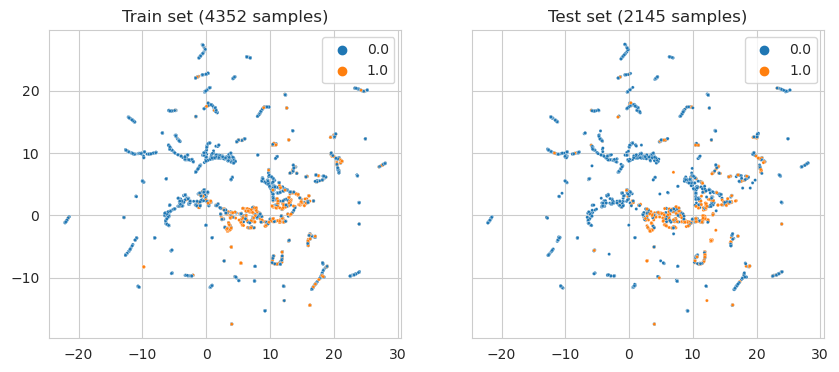

In [6]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.scatterplot(x=setup_dict['X_train'][:, 0], y=setup_dict['X_train'][:, 1], hue=setup_dict['y_train'], palette="tab10", s=5, ax=axs[0])
axs[0].set_title("Train set ({} samples)".format(len(setup_dict['y_train'])))
sns.scatterplot(x=setup_dict['X_test'][:, 0], y=setup_dict['X_test'][:, 1], hue=setup_dict['y_test'], palette="tab10", s=5, ax=axs[1])
axs[1].set_title("Test set ({} samples)".format(len(setup_dict['y_test'])))

plt.legend()
plt.show()

# Run the experiment

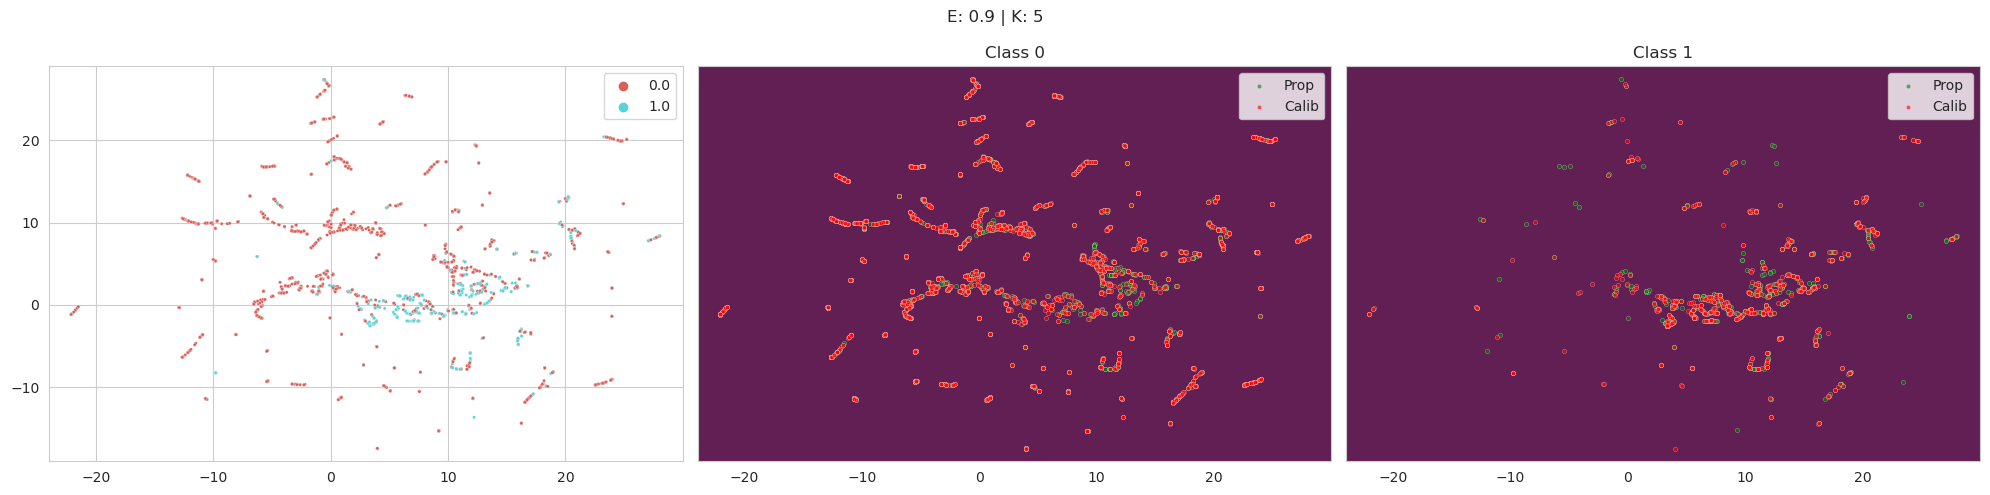

Synthetic samples per class
Label 0.0: (2625, 2)
Label 1.0: (128068, 2)
(2625,)
(130693,)


Baseline results: ORIGINAL


2023-11-03 16:39:09.535449: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


68/68 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      1617
         1.0       0.00      0.00      0.00       528

    accuracy                           0.75      2145
   macro avg       0.38      0.50      0.43      2145
weighted avg       0.57      0.75      0.65      2145



Total synthetic samples: (130693, 2)
Total O+S samples: (135045, 2)


/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

ORIGINAL + SYNTHETIC
68/68 [==============================] - 0s 891us/step
              precision    recall  f1-score   support

         0.0       0.93      0.63      0.75      1617
         1.0       0.43      0.85      0.57       528

    accuracy                           0.68      2145
   macro avg       0.68      0.74      0.66      2145
weighted avg       0.81      0.68      0.70      2145



CLASS 1 | Total: (132420, 2) (synthetic (128068, 2) )
ORIGINAL+SYNTHETIC (CLASS 1)
68/68 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.93      0.59      0.72      1617
         1.0       0.41      0.87      0.55       528

    accuracy                           0.66      2145
   macro avg       0.67      0.73      0.64      2145
weighted avg       0.80      0.66      0.68      2145



Total synthetic samples: (130693, 2)
SYNTHETIC ONLY
68/68 [==============================] - 0s 682us/step
              precision

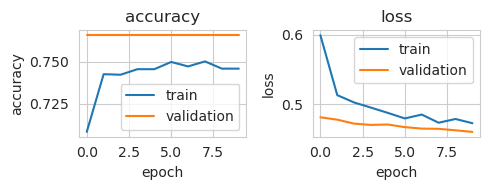

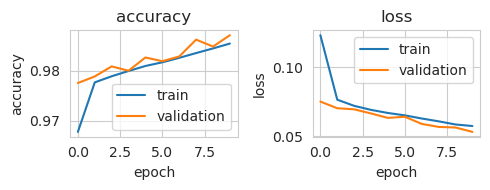

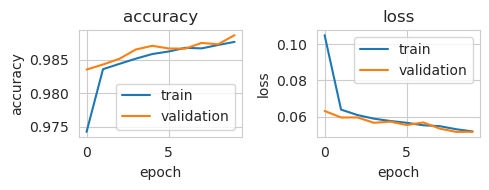

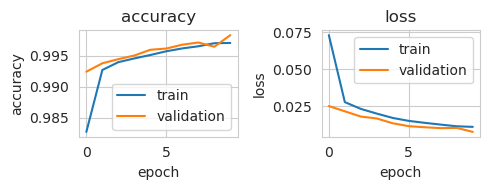

In [7]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[1], is_synthetic=True, tf_seed=1)

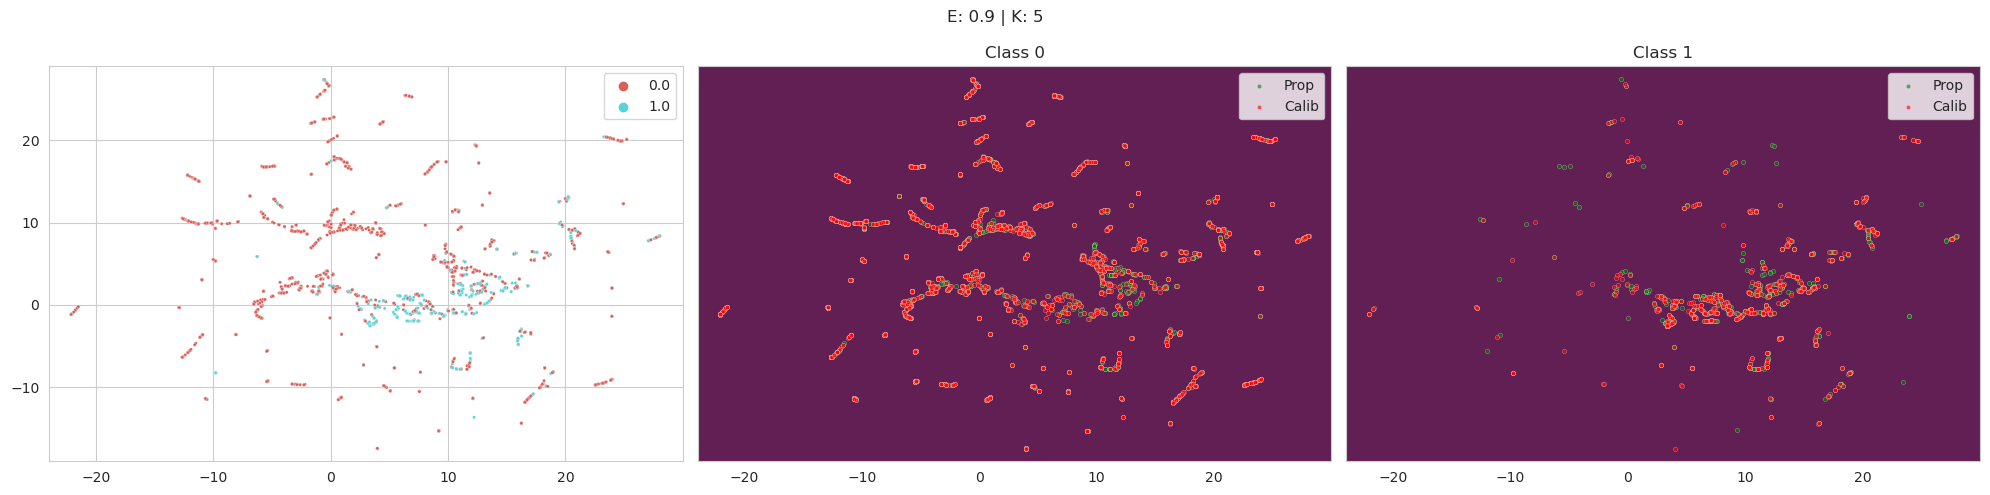

Synthetic samples per class
Label 0.0: (2625, 2)
Label 1.0: (128068, 2)
(2625,)
(130693,)


Baseline results: ORIGINAL
68/68 [==============================] - 0s 4ms/step


/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      1617
         1.0       0.00      0.00      0.00       528

    accuracy                           0.75      2145
   macro avg       0.38      0.50      0.43      2145
weighted avg       0.57      0.75      0.65      2145



Total synthetic samples: (130693, 2)
Total O+S samples: (135045, 2)
ORIGINAL + SYNTHETIC
68/68 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.93      0.65      0.77      1617
         1.0       0.44      0.84      0.58       528

    accuracy                           0.70      2145
   macro avg       0.68      0.75      0.67      2145
weighted avg       0.81      0.70      0.72      2145



CLASS 1 | Total: (132420, 2) (synthetic (128068, 2) )
ORIGINAL+SYNTHETIC (CLASS 1)
68/68 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         

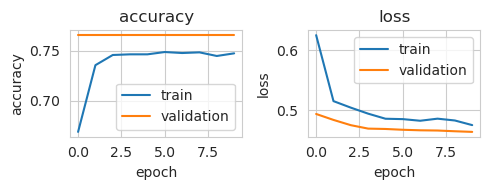

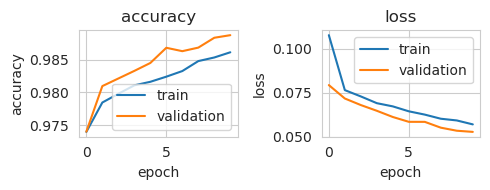

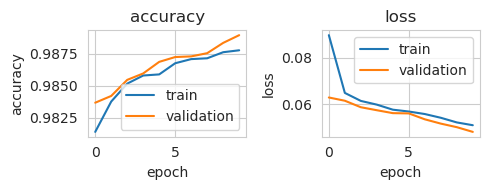

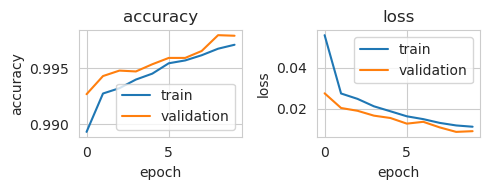

In [8]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[1], is_synthetic=True, tf_seed=12)

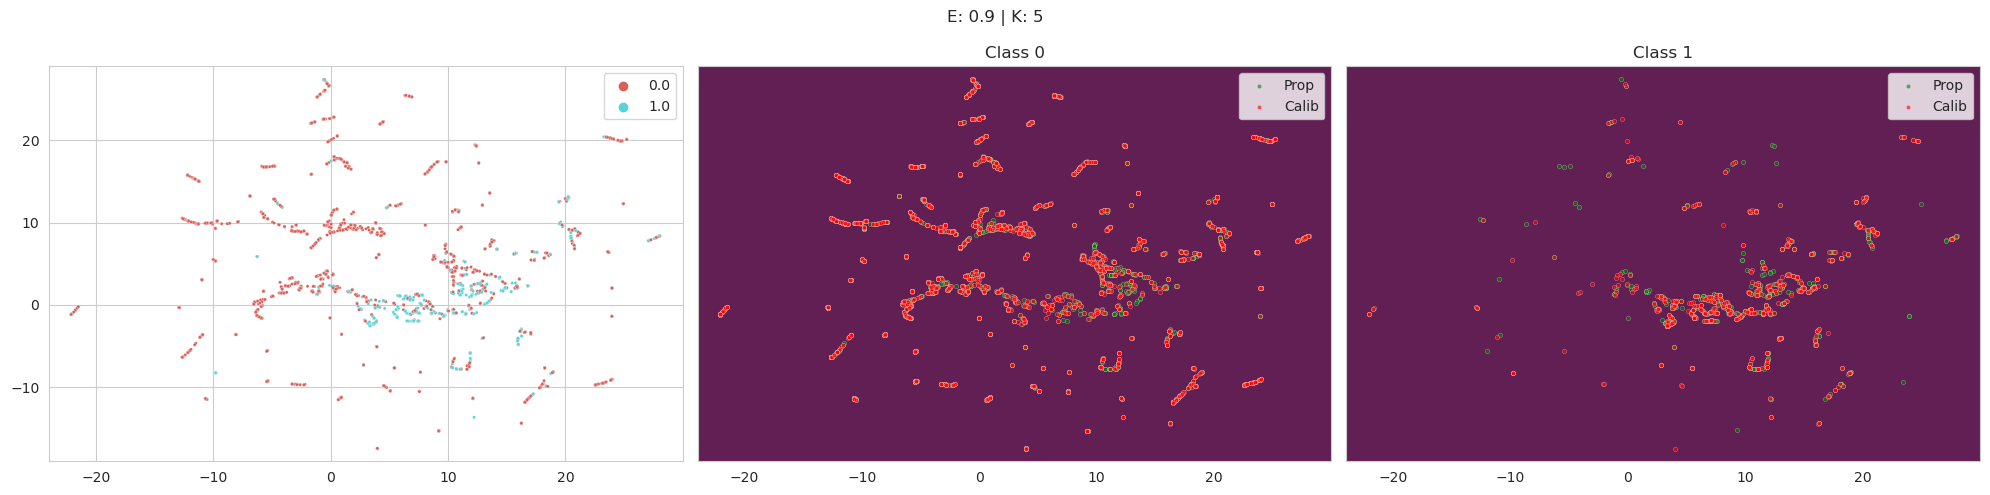

Synthetic samples per class
Label 0.0: (2625, 2)
Label 1.0: (128068, 2)
(2625,)
(130693,)


Baseline results: ORIGINAL
68/68 [==============================] - 0s 1ms/step


/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      1617
         1.0       0.00      0.00      0.00       528

    accuracy                           0.75      2145
   macro avg       0.38      0.50      0.43      2145
weighted avg       0.57      0.75      0.65      2145



Total synthetic samples: (130693, 2)
Total O+S samples: (135045, 2)
ORIGINAL + SYNTHETIC
68/68 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.93      0.70      0.80      1617
         1.0       0.47      0.83      0.60       528

    accuracy                           0.73      2145
   macro avg       0.70      0.76      0.70      2145
weighted avg       0.82      0.73      0.75      2145



CLASS 1 | Total: (132420, 2) (synthetic (128068, 2) )
ORIGINAL+SYNTHETIC (CLASS 1)
68/68 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         

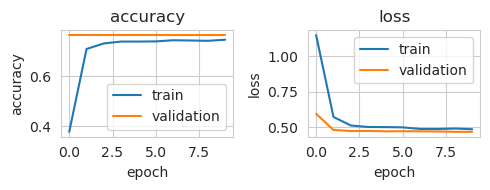

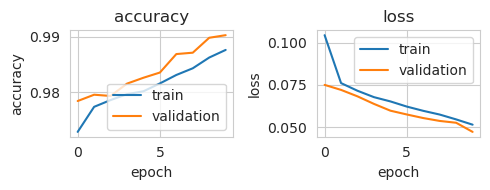

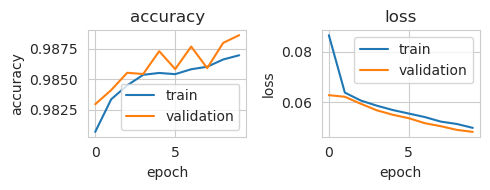

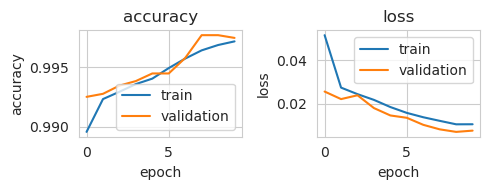

In [9]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[1], is_synthetic=True, tf_seed=42)

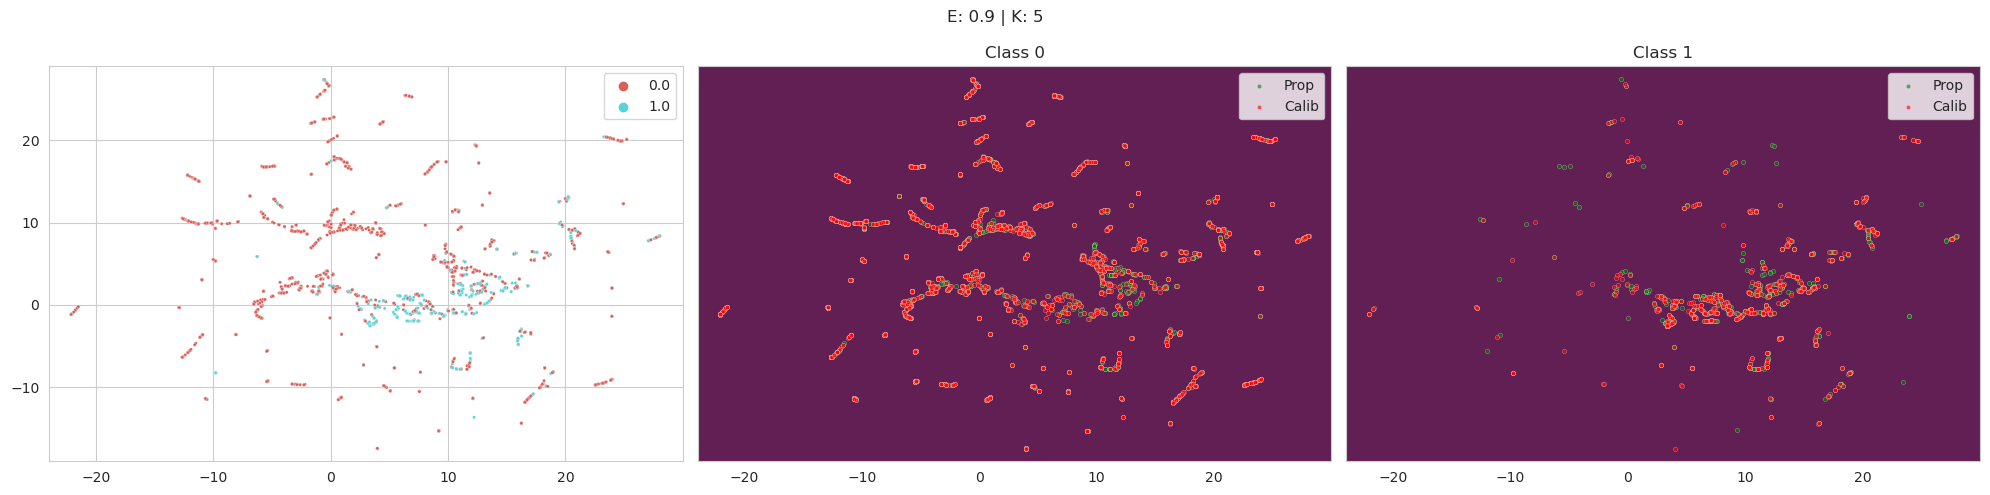

Synthetic samples per class
Label 0.0: (2625, 2)
Label 1.0: (128068, 2)
(2625,)
(130693,)


Baseline results: ORIGINAL
68/68 [==============================] - 0s 956us/step
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      1617
         1.0       0.33      0.00      0.00       528

    accuracy                           0.75      2145
   macro avg       0.54      0.50      0.43      2145
weighted avg       0.65      0.75      0.65      2145



Total synthetic samples: (130693, 2)
Total O+S samples: (135045, 2)
ORIGINAL + SYNTHETIC
68/68 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.94      0.63      0.75      1617
         1.0       0.43      0.87      0.58       528

    accuracy                           0.69      2145
   macro avg       0.68      0.75      0.67      2145
weighted avg       0.81      0.69      0.71      2145



CLASS 1 | Total: (132420, 

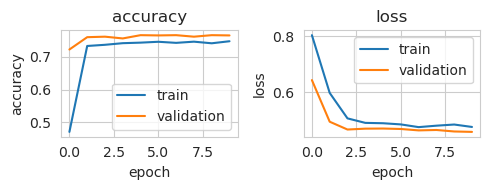

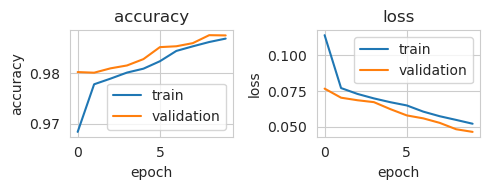

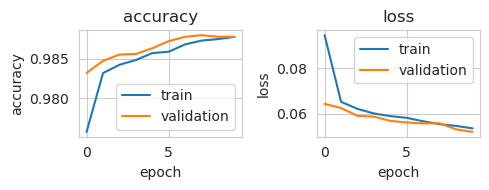

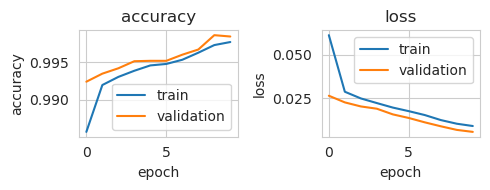

In [10]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[1], is_synthetic=True, tf_seed=50)

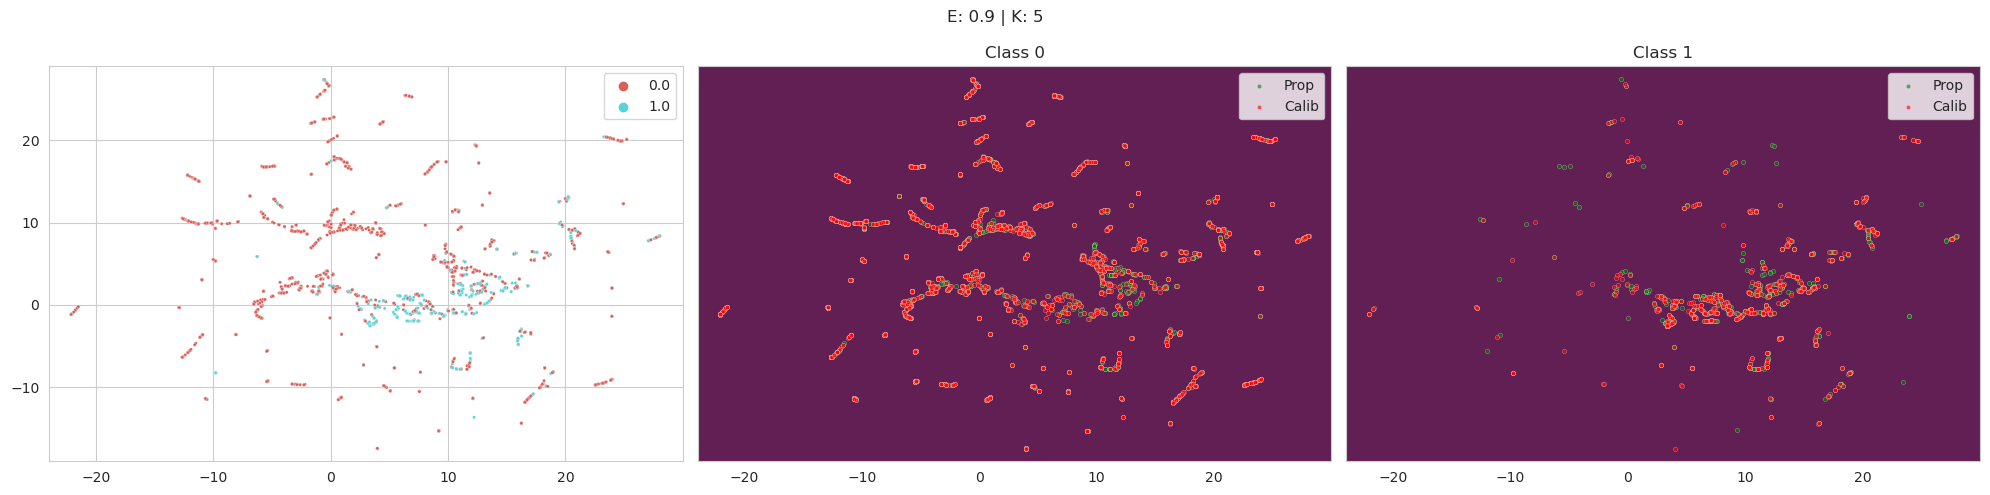

Synthetic samples per class
Label 0.0: (2625, 2)
Label 1.0: (128068, 2)
(2625,)
(130693,)


Baseline results: ORIGINAL
68/68 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      1617
         1.0       0.00      0.00      0.00       528

    accuracy                           0.75      2145
   macro avg       0.38      0.50      0.43      2145
weighted avg       0.57      0.75      0.65      2145



Total synthetic samples: (130693, 2)
Total O+S samples: (135045, 2)


/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

ORIGINAL + SYNTHETIC
68/68 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.92      0.67      0.78      1617
         1.0       0.45      0.82      0.58       528

    accuracy                           0.71      2145
   macro avg       0.69      0.75      0.68      2145
weighted avg       0.80      0.71      0.73      2145



CLASS 1 | Total: (132420, 2) (synthetic (128068, 2) )
ORIGINAL+SYNTHETIC (CLASS 1)
68/68 [==============================] - 0s 735us/step
              precision    recall  f1-score   support

         0.0       0.92      0.58      0.71      1617
         1.0       0.40      0.86      0.54       528

    accuracy                           0.64      2145
   macro avg       0.66      0.72      0.63      2145
weighted avg       0.79      0.64      0.67      2145



Total synthetic samples: (130693, 2)
SYNTHETIC ONLY
68/68 [==============================] - 0s 1ms/step
              precision  

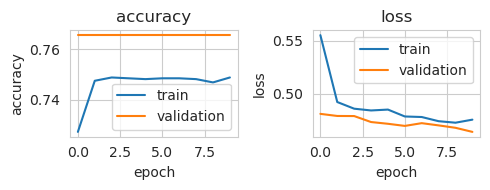

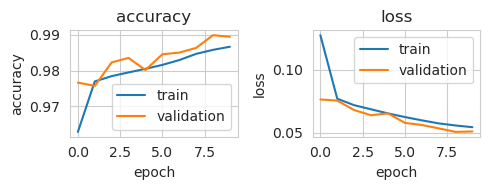

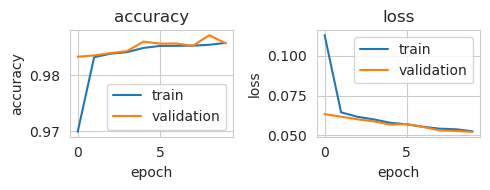

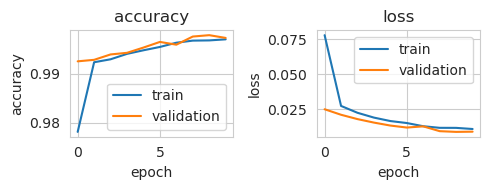

In [11]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[1], is_synthetic=True, tf_seed=100)